In [17]:
from keras_preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.pyplot as plt
import splitfolders
import os

In [18]:
base_path = 'D:\#KULIAH\SEMESTER 5\KECERDASAN BUATAN\PA\datasets'

In [19]:
splitfolders.ratio(
    base_path,
    output='split_dataset',
    ratio=(.8,.2)
)

In [20]:
train_path = 'split_dataset/train'
validation_path = 'split_dataset/val'
os.listdir(validation_path)

['black_dress',
 'black_pants',
 'black_shirt',
 'black_shoes',
 'black_shorts',
 'blue_dress',
 'blue_pants',
 'blue_shirt',
 'blue_shoes',
 'blue_shorts',
 'brown_pants',
 'brown_shoes',
 'brown_shorts',
 'green_pants',
 'green_shirt',
 'green_shoes',
 'green_shorts',
 'red_dress',
 'red_pants',
 'red_shoes',
 'white_dress',
 'white_pants',
 'white_shoes',
 'white_shorts']

In [44]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    zoom_range=0.2)

validation_datagen = ImageDataGenerator(rescale=1./255)

In [45]:
train_image = train_datagen.flow_from_directory(
    train_path,
    target_size=(200, 200),
    classes=['black_dress', 'black_pants', 'black_shirt', 'black_shoes', 'black_shorts',
    'blue_dress', 'blue_pants', 'blue_shirt', 'blue_shoes', 'blue_shorts',
    'brown_pants', 'brown_shoes', 'brown_shorts',
    'green_dress', 'green_pants', 'green_shirt', 'green_shoes', 'green_shorts',
    'red_dress', 'red_pants', 'red_shoes',
    'white_dress', 'white_pants', 'white_shoes', 'white_shorts'
    ],
    class_mode='categorical',
)

validation_image = validation_datagen.flow_from_directory(
    validation_path,
    target_size=(200, 200),
    classes=['black_dress', 'black_pants', 'black_shirt', 'black_shoes', 'black_shorts',
    'blue_dress', 'blue_pants', 'blue_shirt', 'blue_shoes', 'blue_shorts',
    'brown_pants', 'brown_shoes', 'brown_shorts',
    'green_dress', 'green_pants', 'green_shirt', 'green_shoes', 'green_shorts',
    'red_dress', 'red_pants', 'red_shoes',
    'white_dress', 'white_pants', 'white_shoes', 'white_shorts'],
    class_mode='categorical',
)

Found 9101 images belonging to 25 classes.
Found 2284 images belonging to 25 classes.


(32, 200, 200, 3)


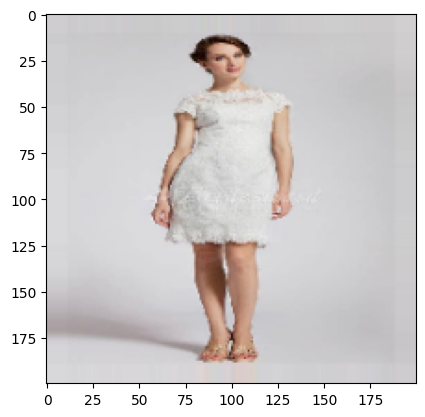

(32, 200, 200, 3)


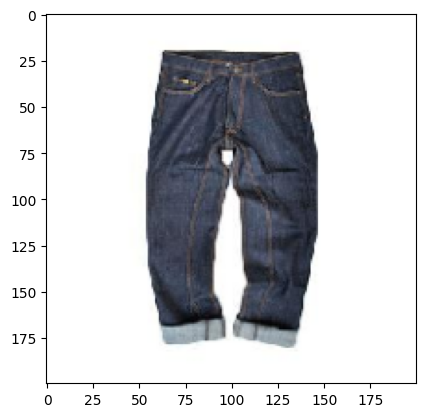

(32, 200, 200, 3)


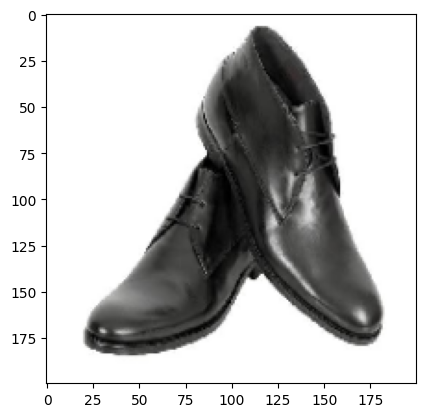

(32, 200, 200, 3)


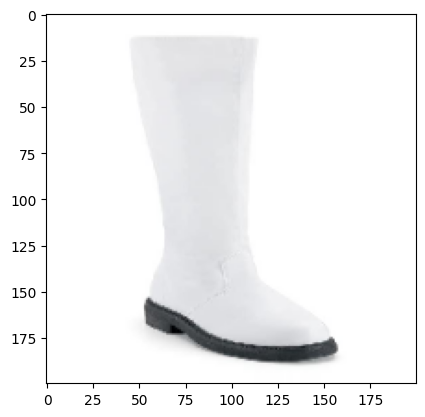

(32, 200, 200, 3)


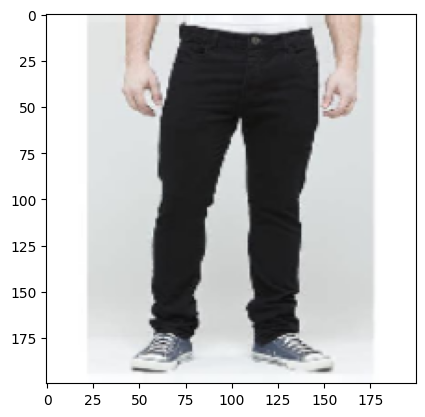

(32, 200, 200, 3)


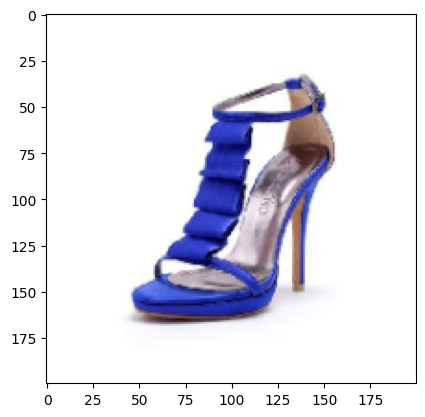

(32, 200, 200, 3)


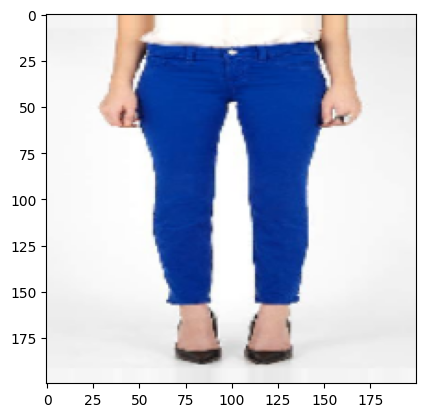

(32, 200, 200, 3)


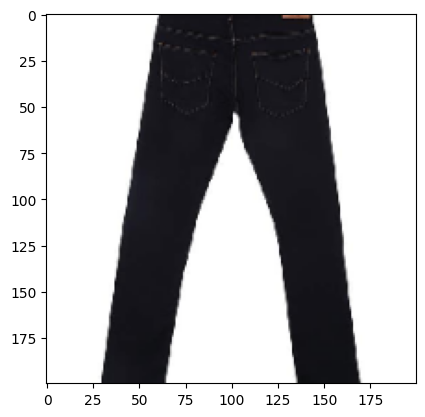

(32, 200, 200, 3)


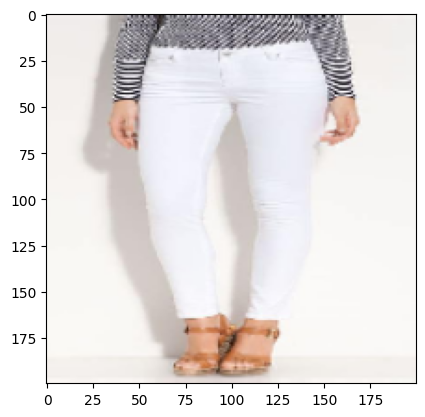

(32, 200, 200, 3)


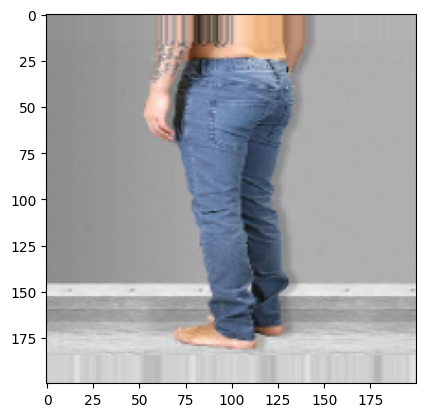

In [46]:
for _ in range(10):
    img, label = train_image.next()
    print(img.shape)
    plt.imshow(img[1])
    plt.show()